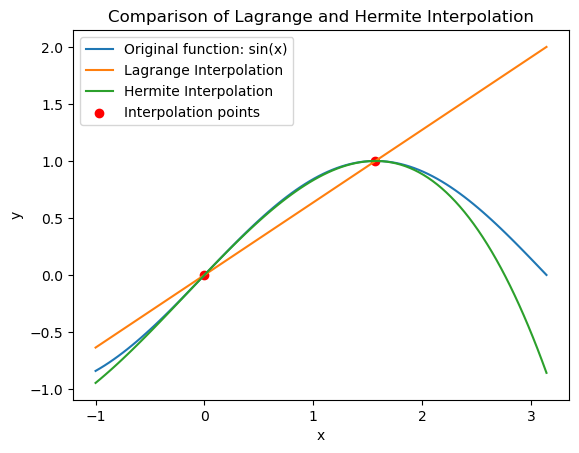

In [6]:
#体现区别

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicHermiteSpline


# 函数sinx
func = lambda x: np.sin(x)
# 导数cosx
deriv = lambda x: np.cos(x)



# 两个插值点
x_points = np.array([0, np.pi / 2])
y_points = func(x_points)
# 导数
y_deriv = deriv(x_points)


# lagrange插值
poly_lagrange = lagrange(x_points, y_points)
# hermite插值
hermite = CubicHermiteSpline(x_points, y_points, y_deriv)


# 绘制sinx、Lagrange插值和Hermite插值、标记插值点
x_vals = np.linspace(-1, np.pi, 100)
plt.plot(x_vals, func(x_vals), label='Original function: sin(x)', linestyle='solid')
plt.plot(x_vals, poly_lagrange(x_vals), label='Lagrange Interpolation', linestyle='solid')
plt.plot(x_vals, hermite(x_vals), label='Hermite Interpolation', linestyle='solid')
plt.scatter(x_points, y_points, color='red', label='Interpolation points')


plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Lagrange and Hermite Interpolation')
plt.grid(False)
plt.show()

In [7]:
#两点三值Hermite插值法
import numpy as np
import matplotlib.pyplot as plt


#处理输入
s = input("请按照此格式输入:x0,x1,f0,f1,f'0,f'1")
num = s.split(',')

def afloat(s):
    if '/' in s:
        numerator, denominator = s.split('/')
        return float(numerator) / float(denominator)
    else:
        return float(s)

x = []
y = []
for i in range(len(num)):
    if i % 2 == 0:
        x.append(afloat(num[i]))
    else:
        y.append(afloat(num[i]))


#  函数fai
def fai0(t):
    return ((1-t)**2)*(1+2*t)

def fai1(t):
    return t*((1-t)**2)


#  h=x1-x0
#  四个函数h
def h00(x,x0,h):
    return fai0((x-x0)/h)

def h10(x,x1,h):
    return fai0((x1-x)/h)

def h01(x,x0,h):
    return h*fai1((x-x0)/h)

def h11(x,x1,h):
    return -h*fai1((x1-x)/h)


# 函数H_3(x)   
# 其中f0,f1分别表示f(x0),f(x1);f00,f11分别表示f'(x0),f'(x1)
def H3(x,f0,f1,f00,f11,x0,x1):
    h = x1 - x0
    return f0*h00(x,x0,h) + f1*h10(x,x1,h) + f00*h01(x,x0,h) + f11*h11(x,x1,h)


# 想要预测的x点
ver = input("请输入想要的 y 对应的 x:")
ver = afloat(ver)
print("对应的 y 值为:", H3(ver,x[1],y[1],x[2],y[2],x[0],y[0]))


# 生成 x 轴的范围
x_min = min(x[0],y[0]) - 10
x_max = max(y[0],x[0]) + 10
x_range = x_max - x_min
x_values = [x_min + i * x_range / 100 for i in range(101)]  # 生成 100 个点

# 计算对应的 y 值
y_values = [H3(x_val,x[1],y[1],x[2],y[2],x[0],y[0]) for x_val in x_values]



# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Hermite Interpolation", color="blue")
plt.scatter(x[0], x[1], label="Given Data Points", color="red", zorder=5)
plt.scatter(y[0], y[1], label="Given Data Points", color="red", zorder=5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Hermite Interpolation")
plt.legend()
plt.grid(True)
plt.show()



ZeroDivisionError: float division by zero

对应的 y 值为: 3582.0


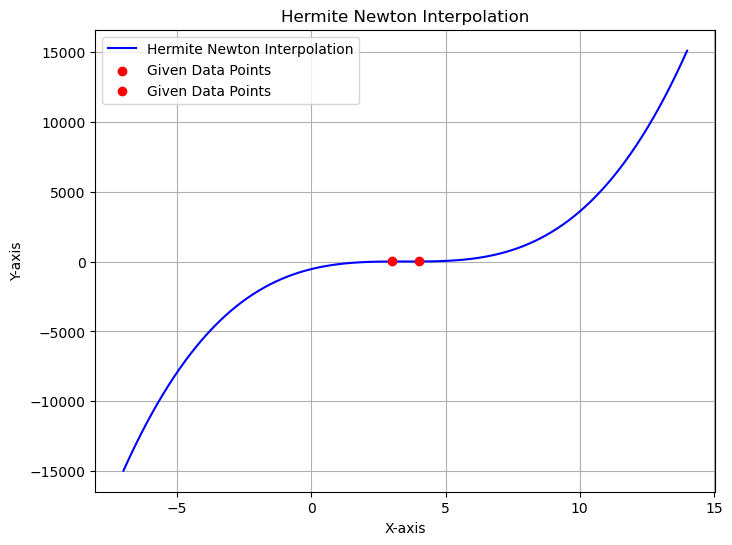

In [ ]:
#两点三值Hermite插值法
import numpy as np
import matplotlib.pyplot as plt


#处理输入
s = input("请按照此格式输入:x0,x1,f0,f1,f'0,f'1")
num = s.split(',')

def afloat(s):
    if '/' in s:
        numerator, denominator = s.split('/')
        return float(numerator) / float(denominator)
    else:
        return float(s)

x = []
y = []
for i in range(len(num)):
    if i % 2 == 0:
        x.append(afloat(num[i]))
    else:
        y.append(afloat(num[i]))



# 函数H_3(x)   
# 其中f0,f1分别表示f(x0),f(x1);f00,f11分别表示f'(x0),f'(x1)
def H3(x,f0,f1,f00,f11,x0,x1):
    f_x0_x0 = f00
    f_x1_x1 = f11
    f_x0_x1 = (f1-f0) / (x1-x0)
    f_x0_x0_x1 = (f_x0_x1 - f_x0_x0) / (x1-x0)
    f_x0_x1_x1 = (f_x1_x1 - f_x0_x1) / (x1-x0)
    f_x0_x0_x1_x1 = (f_x0_x1_x1 - f_x0_x0_x1) / (x1-x0)
    return f0 + f_x0_x0*(x-x0) + f_x0_x0_x1*((x-x0)**2) + f_x0_x0_x1_x1*((x-x0)**2)*(x-x1)



# 想要预测的x点
ver = input("请输入想要的 y 对应的 x:")
ver = afloat(ver)
print("对应的 y 值为:", H3(ver,x[1],y[1],x[2],y[2],x[0],y[0]))


# 生成 x 轴的范围
x_min = min(x[0],y[0]) - 10
x_max = max(y[0],x[0]) + 10
x_range = x_max - x_min
x_values = [x_min + i * x_range / 100 for i in range(101)]  # 生成 100 个点

# 计算对应的 y 值
y_values = [H3(x_val,x[1],y[1],x[2],y[2],x[0],y[0]) for x_val in x_values]



# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Hermite Newton Interpolation", color="blue")
plt.scatter(x[0], x[1], label="Given Data Points", color="red", zorder=5)
plt.scatter(y[0], y[1], label="Given Data Points", color="red", zorder=5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Hermite Newton Interpolation")
plt.legend()
plt.grid(True)
plt.show()


对应的 y 值为: -0.5106609999999999


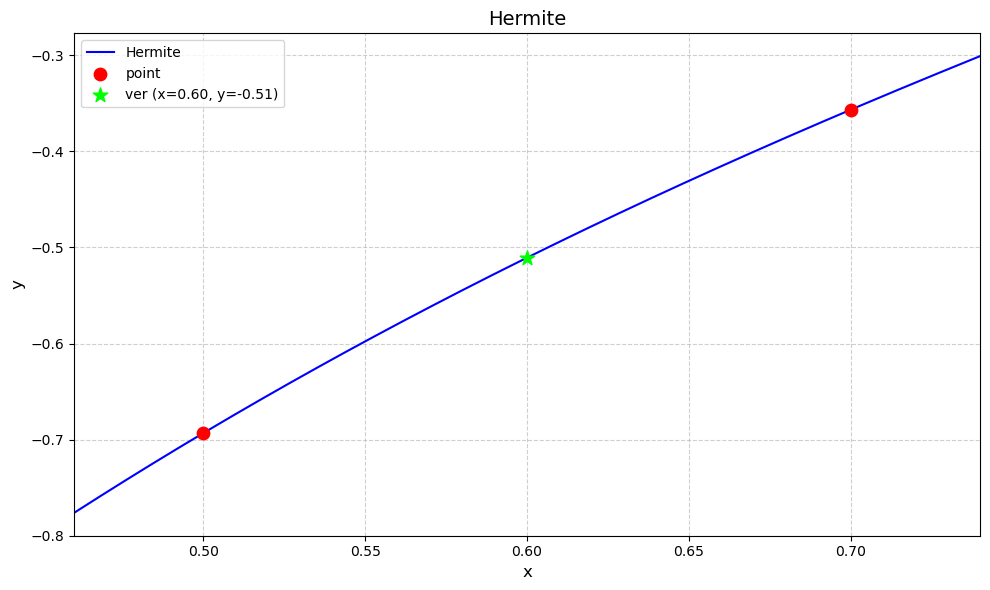

In [49]:
#Hermite插值法
import numpy as np
import matplotlib.pyplot as plt


#处理输入
s = input("请按照此格式输入:x0,f0,f'0,x1,f1,f'1......")
num = s.split(',')
n = int(len(num)/3)

def afloat(s):
    if '/' in s:
        numerator, denominator = s.split('/')
        return float(numerator) / float(denominator)
    else:
        return float(s)

x = []
fx = []
fxx = []
for i in range(len(num)):
    if i % 3 == 0:
        x.append(afloat(num[i]))
    if i % 3 == 1:
        fx.append(afloat(num[i]))
    if i % 3 == 2:
        fxx.append(afloat(num[i]))



def lx(x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (x[i]-x[j])
    return sum
def ls(ver,x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (ver-x[j])
    return sum
def l(ver,x,i):
    return ls(ver,x,i)/lx(x,i)



def a(ver,x,i):
    sum = 0
    for j in range(n):
        if j == i:
            sum =sum
        if j != i:
            sum = sum + 1/(x[i]-x[j])

    return (1-2*(ver-x[i])*sum)*l(ver,x,i)*l(ver,x,i)
def b(ver,x,i):
    return (ver-x[i])*l(ver,x,i)*l(ver,x,i)




def Hermite(ver,x,fx,fxx):
    sum = 0
    for i in range(n):
        sum =sum + a(ver,x,i)*fx[i] + b(ver,x,i)*fxx[i]
    return sum


# 预测
ver = input("请输入想要的 y 对应的 x:")
ver = afloat(ver)
y_pred = Hermite(ver, x, fx, fxx)
print("对应的 y 值为:", y_pred)

# 绘制Hermite插值曲线
x_min = min(x)
x_max = max(x)
padding = (x_max - x_min) * 0.2  
x_plot = np.linspace(x_min - padding, x_max + padding, 1000)
y_plot = [Hermite(xi, x, fx, fxx) for xi in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Hermite', color='blue')
plt.scatter(x, fx, color='red', zorder=5, label='point', s=80)
# 标出预测点
plt.scatter([ver], [y_pred], 
            color='lime', 
            zorder=6, 
            s=120,
            marker='*',
            label=f'ver (x={ver:.2f}, y={y_pred:.2f})')


plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Hermite', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(x_min - padding, x_max + padding)
plt.tight_layout()
plt.show()





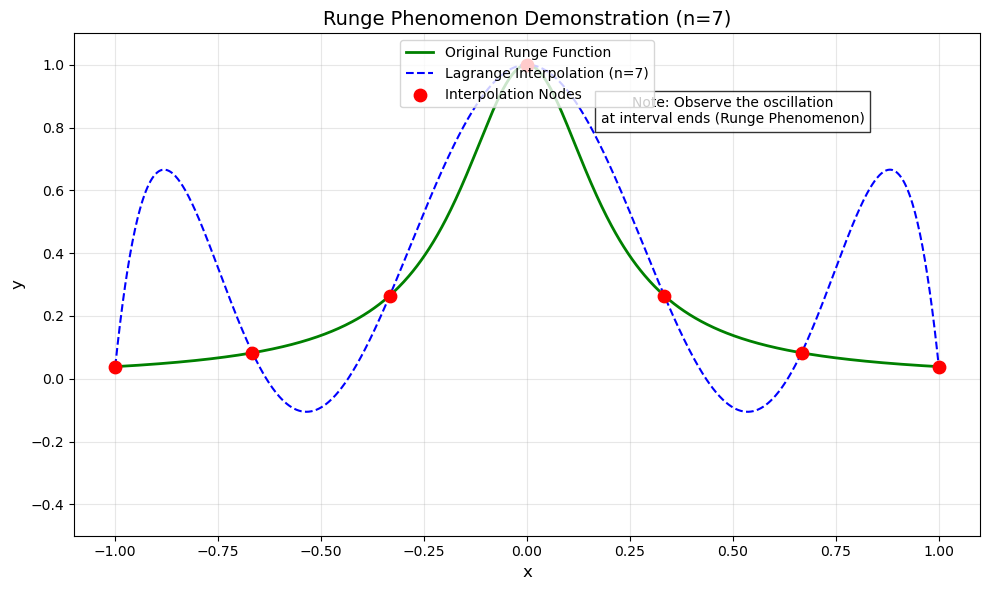

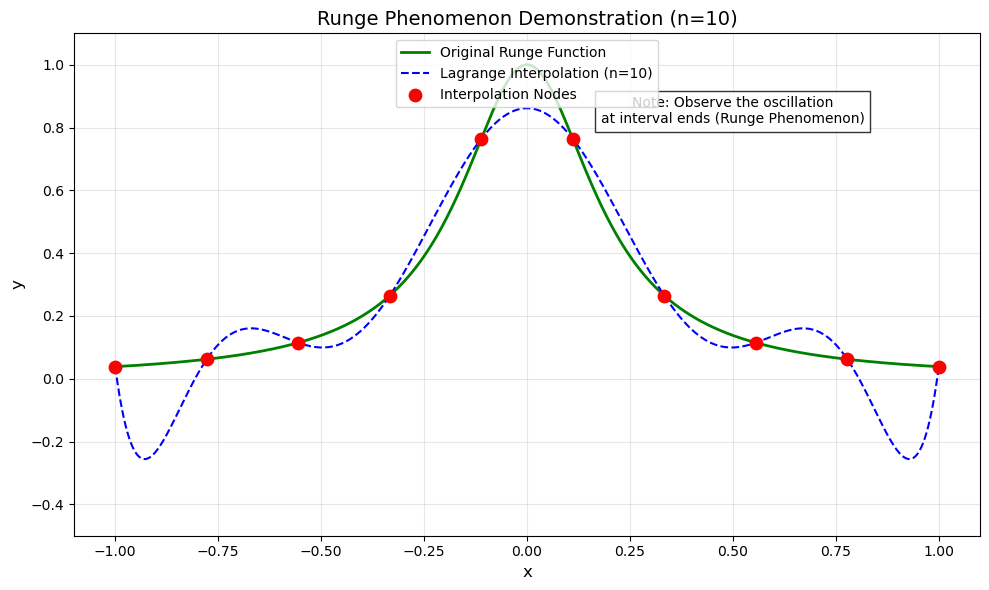

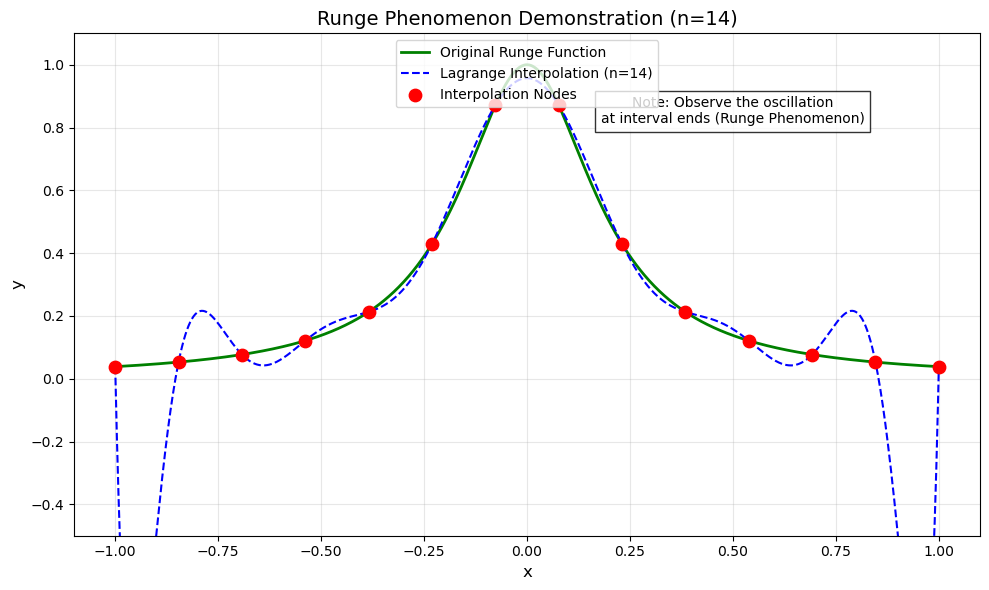

In [3]:
#lagrange插值
from math import *
import matplotlib.pyplot as plt
import numpy as np



def lx(x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (x[i]-x[j])
    return sum

def ls(ver,x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (ver-x[j])
    return sum



def lagrange(ver,x,y):
    n=len(x)
    sum=0
    for i in range(n):
        sum = sum + y[i]*ls(ver,x,i)/lx(x,i)
    return sum   


def Runge(ver):
    return 1/(1+25*ver*ver)

# 生成插值节点
def generate_nodes(n, x, y):
    x.clear()
    y.clear()
    for i in range(n):
        x.append(-1 + 2 * i / (n-1))  # 修正节点生成公式
    for xi in x:
        y.append(Runge(xi))

# 参数设置
n = 7  # 可以修改这个值观察不同插值点数的效果
x = []
y = []
generate_nodes(n, x, y)

# 生成绘图点
x_plot = np.linspace(-1, 1, 1000)  # 在[-1, 1]区间生成1000个点

# 计算插值结果和原始函数值
y_lagrange = [lagrange(xi, x, y) for xi in x_plot]
y_runge = [Runge(xi) for xi in x_plot]

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_runge, label="Original Runge Function", color="green", linewidth=2)
plt.plot(x_plot, y_lagrange, label=f"Lagrange Interpolation (n={n})", color="blue", linestyle='--')
plt.scatter(x, y, label="Interpolation Nodes", color="red", zorder=5, s=80)

# 图形美化
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(f"Runge Phenomenon Demonstration (n={n})", fontsize=14)
plt.legend(loc='upper center', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-1.1, 1.1)
plt.ylim(-0.5, 1.1)

# 标注说明
plt.text(0.5, 0.9, "Note: Observe the oscillation\nat interval ends (Runge Phenomenon)",
         ha='center', va='top', fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



# 参数设置
n = 10  # 可以修改这个值观察不同插值点数的效果
x = []
y = []
generate_nodes(n, x, y)

# 生成绘图点
x_plot = np.linspace(-1, 1, 1000)  # 在[-1, 1]区间生成1000个点

# 计算插值结果和原始函数值
y_lagrange = [lagrange(xi, x, y) for xi in x_plot]
y_runge = [Runge(xi) for xi in x_plot]

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_runge, label="Original Runge Function", color="green", linewidth=2)
plt.plot(x_plot, y_lagrange, label=f"Lagrange Interpolation (n={n})", color="blue", linestyle='--')
plt.scatter(x, y, label="Interpolation Nodes", color="red", zorder=5, s=80)

# 图形美化
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(f"Runge Phenomenon Demonstration (n={n})", fontsize=14)
plt.legend(loc='upper center', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-1.1, 1.1)
plt.ylim(-0.5, 1.1)

# 标注说明
plt.text(0.5, 0.9, "Note: Observe the oscillation\nat interval ends (Runge Phenomenon)",
         ha='center', va='top', fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()




# 参数设置
n = 14  # 可以修改这个值观察不同插值点数的效果
x = []
y = []
generate_nodes(n, x, y)

# 生成绘图点
x_plot = np.linspace(-1, 1, 1000)  # 在[-1, 1]区间生成1000个点

# 计算插值结果和原始函数值
y_lagrange = [lagrange(xi, x, y) for xi in x_plot]
y_runge = [Runge(xi) for xi in x_plot]

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_runge, label="Original Runge Function", color="green", linewidth=2)
plt.plot(x_plot, y_lagrange, label=f"Lagrange Interpolation (n={n})", color="blue", linestyle='--')
plt.scatter(x, y, label="Interpolation Nodes", color="red", zorder=5, s=80)

# 图形美化
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(f"Runge Phenomenon Demonstration (n={n})", fontsize=14)
plt.legend(loc='upper center', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-1.1, 1.1)
plt.ylim(-0.5, 1.1)

# 标注说明
plt.text(0.5, 0.9, "Note: Observe the oscillation\nat interval ends (Runge Phenomenon)",
         ha='center', va='top', fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()